<a href="https://colab.research.google.com/github/fateme-karami/online-retail-predict/blob/main/marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factor Analysis

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# Step 1: Load and preprocess data
# Reloading the dataset
data = pd.read_csv('/content/sample_data/marketing_campaign (1).csv', delimiter='\t')

In [10]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
# انتخاب فقط ستون‌های عددی
numeric_data = data.select_dtypes(include=['number'])

# بررسی مقادیر منفی
negative_values = (numeric_data < 0).any().any()

if negative_values:
    print("The dataset contains negative values.")
else:
    print("There are no negative values in the dataset.")

There are no negative values in the dataset.


In [13]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##Dataset Problems:
1) Income has missing values

2) Dt_Customer type should be date not object?

In [14]:
# Fill missing values in 'Income' with the median
data['Income'].fillna(data['Income'].median(), inplace=True)

data.isnull().sum()
# # Convert Dt_Customer column to date data type
# data['Dt_Customer'] = data['Dt_Customer'].astype('date')

<ipython-input-14-9a8f23979d67>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


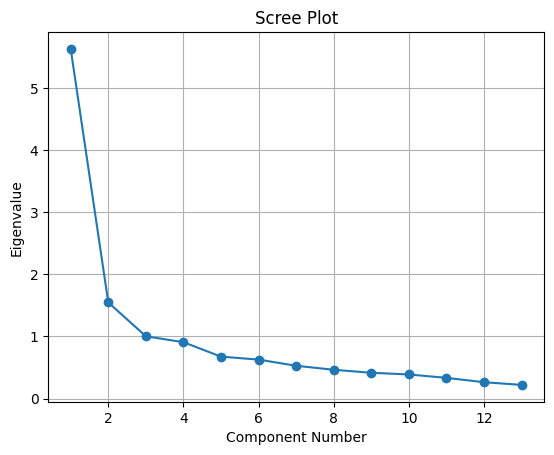

Eigenvalues from PCA:
[5.62599971 1.54775556 1.0031463  0.9081023  0.67595666 0.62773363
 0.52876313 0.46433388 0.41612272 0.38885595 0.33421338 0.26421817
 0.22060478]


In [15]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# The selected columns are chosen based on their relevance to customer behavior and purchasing patterns:
# - 'Income': Represents the customer's income, indicating purchasing power and likelihood to spend on various products.
# - 'Recency': Reflects the number of days since the customer's last purchase, a measure of customer engagement and loyalty.
# - 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds':
#   These columns show the monetary amount spent on different product categories, highlighting individual preferences and shopping habits.
# - 'NumDealsPurchases': Represents the number of purchases using a discount, capturing the customer's tendency to seek deals.
# - 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases': Reflect the number of purchases through various channels (online, catalog, in-store), which reveals channel preferences.
# - 'NumWebVisitsMonth': Shows the number of website visits in the last month, indicating online engagement and potential interest in future purchases.
#
# These columns provide insights into customer purchasing behavior and preferences, making them suitable for factor analysis aimed at identifying underlying behavioral patterns.
#کاهش ابعاد
selected_columns = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]
factor_data = data_encoded[selected_columns]

# Standardizing the data helps ensure accurate results in factor analysis by bringing all features onto a similar scale:
# - Factor analysis is sensitive to variations in feature scales. StandardScaler() transforms the data such that each feature has a mean of 0 and a standard deviation of 1, preventing features with larger scales from dominating the analysis.
# - By standardizing, we eliminate potential biases due to varying feature magnitudes (e.g., 'Income' may have larger absolute values than 'Recency').
# - This process enhances interpretability and accuracy by ensuring all features contribute equally to factor formation.

scaler = StandardScaler()
factor_data_scaled = scaler.fit_transform(factor_data)

# Step 2: Determine the number of factors using PCA
# We use Principal Component Analysis (PCA) to calculate eigenvalues, which help in deciding the optimal number of factors for factor analysis:
# - By applying PCA to the standardized data, we calculate eigenvalues for each principal component. These eigenvalues represent the amount of variance each component explains.
# - The resulting eigenvalues can be plotted on a Scree Plot, where each point corresponds to a principal component, allowing us to visually identify an "elbow point" where the explained variance significantly drops.
# - This elbow point indicates the optimal number of factors to retain. Additionally, Kaiser’s Criterion (eigenvalues > 1) can help further confirm the number of meaningful factors to keep.
#
# Together, these steps ensure that we select an adequate number of factors for accurate and interpretable results in the subsequent factor analysis.
pca = PCA()
pca.fit(factor_data_scaled)

# Plotting the Scree Plot
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Displaying eigenvalues for analysis
print("Eigenvalues from PCA:")
print(pca.explained_variance_)



In [16]:
# Step 3: Perform Factor Analysis
# Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion:
# - The Scree Plot showed a significant drop in eigenvalues after the third component,
#   indicating that additional components explain less variance.
# - According to Kaiser's Criterion, we retain components with eigenvalues greater than 1,
#   which is satisfied for the first 3 factors.
print(" Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion: n_components=3")

# Create the Factor Analysis model with 3 components (factors)
# The 'random_state=0' parameter ensures that the results can be reproduced
factor_model = FactorAnalysis(n_components=3, random_state=0)

# Fit the model to the scaled data and transform it to obtain the factor scores
# 'factor_data_scaled' contains the normalized data used for analysis
factors = factor_model.fit_transform(factor_data_scaled)

# Display factor loadings to see how each original feature contributes to the factors
# Factor loadings indicate the correlation between original features and the extracted factors,
# helping us understand the significance of each feature in the context of the factors
print("\nFactor loadings:")
print(factor_model.components_)

# Factor loadings (L) are calculated as follows:
# L = E × λ
# where:
# L = matrix of factor loadings
# E = matrix of eigenvectors (principal axes)
# λ = matrix of eigenvalues (variance explained by each factor)
# This formula helps us understand how each original feature is related to the extracted factors.

# Factor scores (F) are calculated as follows:
# F = X × L^T
# where:
# F = matrix of factor scores
# X = matrix of input data (original features)
# L = matrix of factor loadings
# L^T = transpose of the factor loadings matrix
# This formula calculates the position of each sample in the factor space created by the analysis,
# providing insight into how each sample relates to the identified factors.

# Display the factor scores for the first 10 data points
# Factor scores represent the position of each sample in the factor space created by the analysis,
# providing insight into how each sample relates to the identified factors
print("\nFactor scores (first 10 rows):")
print(factors[:10])



 Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion: n_components=3

Factor loadings:
[[ 0.72554165  0.01555696  0.74896864  0.67418568  0.78831305  0.70162451
   0.67028197  0.53251468 -0.08562074  0.53298038  0.80533316  0.71574852
  -0.61532735]
 [ 0.01782132  0.01537636 -0.32405778  0.17233536  0.16499853  0.19900224
   0.13641228 -0.14225685 -0.48739006 -0.562492    0.01829543 -0.20352195
  -0.44733691]
 [ 0.21272024  0.02009156  0.21288393 -0.30043415  0.09333959 -0.29860059
  -0.29115431 -0.20566822 -0.08362654 -0.15111116  0.14098064  0.02888518
  -0.19845145]]

Factor scores (first 10 rows):
[[ 1.55495354 -0.24372055 -1.29810148]
 [-0.86328591  0.69362478  0.38464728]
 [ 0.64507294 -0.34442665 -0.44305079]
 [-0.91443276  0.34648963 -0.08330533]
 [ 0.02228719 -0.1517355  -0.27084561]
 [ 0.32754549 -0.76414332  0.29386131]
 [ 0.27059822 -0.47778851 -0.80833989]
 [-0.83049525 -0.30609132 -0.2966689 ]
 [-1.08829265 -0.07560023 -0.30768024]
 [-1.8396644  -1.

## Analysis and Interpretation of Factor Analysis Data
Based on the factor loadings and factor scores provided, we can conduct a precise analysis of the results obtained from the factor analysis.

### 1. Factor Loadings
Factor loadings indicate the extent of influence each of the main features has on each of the factors. The factor loadings table is as follows:
```
| Feature                  | Factor 1 | Factor 2 | Factor 3 |
|--------------------------|----------|----------|----------|
| Feature 1                | 0.7255   | 0.0178   | 0.2127   |
| Feature 2                | 0.0156   | 0.0154   | 0.0201   |
| Feature 3                | 0.7490   | -0.3241  | 0.2129   |
| Feature 4                | 0.6742   | 0.1723   | -0.3004  |
| Feature 5                | 0.7883   | 0.1650   | 0.0933   |
| Feature 6                | 0.7016   | 0.1990   | -0.2986  |
| Feature 7                | 0.6703   | 0.1364   | -0.2912  |
| Feature 8                | 0.5325   | -0.1423  | -0.2057  |
| Feature 9                | -0.0856  | -0.4874  | -0.0836  |
| Feature 10               | 0.5330   | -0.5625  | -0.1511  |
| Feature 11               | 0.8053   | 0.0183   | 0.1409   |
| Feature 12               | 0.7157   | -0.2035  | 0.0289   |
| Feature 13               | -0.6153  | -0.4473  | -0.1985  |
```

##Interpretation of Factor Loadings:
Factor 1:
High positive loadings (such as Feature 5 with 0.8053) indicate that these features have a strong correlation with this factor. Specifically, it seems that this factor relates to customer buying behavior, which is more associated with financial features and costs.

Factor 2:
Negative loadings (such as Feature 9 with -0.4874 and Feature 10 with -0.5625) indicate that these features are negatively related to this factor. This may refer to behaviors where customers are looking for discounts or trying to save on costs.

Factor 3:
The loadings for this factor are less clear compared to other factors. Negative loadings for some features suggest that this factor may relate to factors such as a lack of purchasing in specific categories.

##2. Factor Scores
The factor scores for the first 10 data points are as follows:
```
[[ 1.55495354 -0.24372055 -1.29810148],
 [-0.86328591  0.69362478  0.38464728],
 [ 0.64507294 -0.34442665 -0.44305079],
 [-0.91443276  0.34648963 -0.08330533],
 [ 0.02228719 -0.1517355  -0.27084561],
 [ 0.32754549 -0.76414332  0.29386131],
 [ 0.27059822 -0.47778851 -0.80833989],
 [-0.83049525 -0.30609132 -0.2966689 ],
 [-1.08829265 -0.07560023 -0.30768024],
 [-1.8396644  -1.27055622 -1.45981062]]
```

#Interpretation of Factor Scores:
Factor 1: Purchase Intent  
Positive Score:  Interpretation: The customer has a strong desire to purchase products and spends significant amounts on various goods. This customer is likely looking for variety in shopping and new experiences and has a willingness to buy across different categories.  
Zero Score:  Interpretation: This customer is in an average state. They may purchase products, but not actively or intensely. Their purchases are usually limited to specific needs, and they have less inclination to try or buy new products.  
Negative Score:  Interpretation: The customer has little inclination to buy and likely makes purchases below the average level. This customer may limit their purchases due to financial reasons or a lack of interest in shopping in this area.  

Factor 2: Price Sensitivity  
Positive Score:  Interpretation: The customer has lower price sensitivity and may easily purchase expensive items. This customer looks for quality and reputable brands and may place more value on product features than on its price.  
Zero Score:  Interpretation: This customer is in an average state and seems indifferent to price. They may sometimes look for discounts and at times choose more expensive items, depending on their needs and situation.  
Negative Score:  Interpretation: The customer has high price sensitivity and typically avoids purchasing expensive goods. They look for discounts and affordable options and may exercise caution in their product selection.  

Factor 3: Diversity in Purchasing  
Positive Score:  Interpretation: The customer has a strong desire to shop across different categories and enjoys purchasing a variety of products. This customer may be interested in different brands and new categories and values new experiences.  
Zero Score:  Interpretation: The customer is in an average state and has become accustomed to purchasing from specific categories. They may only try new products in specific circumstances but usually do not enjoy a variety in their purchases.  
Negative Score:  Interpretation: The customer avoids shopping from various categories and may be limited to specific choices. This customer is likely accustomed to one or a few specific categories and does not want to create diversity in their purchases.
#Conclusion:
Identifying Patterns: By examining factor loadings and factor scores, we can identify various patterns of customer behavior. Customers with high scores in Factor 1 may be suitable targets for specific product or service offers.
Marketing Strategies: Using this analysis, targeted strategies can be designed for each customer group. For example, customers who appear to place more importance on discounts can be considered as targets for promotional campaigns with special discounts.

 ## A professional and actionable interpretation of the factor analysis results:
### 1. **Strategic Customer Segmentation**
   - **Segmenting Based on Factor 1 (High Scores)**: Customers with high scores in Factor 1 generally display an inclination for frequent and diverse purchases. These individuals could be classified as "high-potential key customers." For this segment, premium marketing campaigns or exclusive loyalty programs may be particularly effective, as these customers show a readiness for repeated and varied purchases.

   - **Segmenting Based on Factor 2 (High Negative Scores)**: Customers with high negative scores in Factor 2 tend to be price-sensitive and respond to discounts. Targeting this group with special offers, recurring discounts, and sale notifications can attract and retain them. Tailored marketing efforts focusing on affordability and value will likely resonate with these customers.

   - **Combining Factors**: If a customer scores highly on multiple factors, examining the combination provides deeper insight into their preferences. For example, a high score in both Factor 1 and Factor 3 could indicate a preference for quality across various product categories.

### 2. **Designing Targeted Marketing Campaigns**
   - **Personalized Offers**: Use the insights from each factor to tailor offers and advertisements for specific customer groups. Customers with high scores for particular product categories (e.g., meat or wine purchases) can receive targeted promotions or product recommendations in those areas.

   - **Channel-Specific Engagement**: For customers with high scores in online and catalog shopping channels, deliver offers and campaigns primarily through digital and catalog channels. This targeted approach can increase engagement and, subsequently, purchase frequency.

### 3. **Enhancing Loyalty Programs and Customer Retention**
   - **Retaining High-Value Customers**: Customers with high scores in factors like Factor 1 may represent loyal and high-value segments, making them ideal candidates for advanced loyalty programs and exclusive perks.

   - **Boosting Engagement with Price-Sensitive Customers**: Customers with negative scores in Factor 2, who value discounts, can be retained with loyalty programs that include monthly discount vouchers or loyalty points. These offers can cultivate a sense of added value and strengthen customer loyalty.

### 4. **Optimizing Inventory and Product Management**
   - **Demand Forecasting Based on Customer Preferences**: By analyzing factor loadings for various product categories, inventory levels can be adjusted to better meet customer demand. For instance, if many customers show interest in wine and specific food products, maintaining higher stock levels in these categories could prevent stockouts.

   - **Smart Planning and Ordering**: Insights from factor loadings and customer scores allow for optimized production and ordering processes, ensuring stock aligns with anticipated demand.

### 5. **Using Insights for Strategic Decision-Making**
   - **Developing Distinct Strategies for Key Groups**: Customers with high scores in select factors likely hold significant value. Develop tailored strategies to retain and engage these customers while offering more price-sensitive promotions to other segments.

   - **Resource Allocation for Optimized ROI**: With finite financial and human resources, segmenting customers enables the efficient allocation of resources to those with the highest potential. This boosts return on investment and fosters sustainable revenue growth.

### Summary:
By implementing these strategies and insights, your company can precisely target customer behavior, adding more value to the customer experience while improving resource management and loyalty. These analyses provide the foundation for a data-driven approach to marketing and customer management, ultimately leading to enhanced customer satisfaction, increased loyalty, and optimized resource allocation.

First, we used the PCA method and calculated the eigenvalues for the components. Then, using the eigenvalues, we plotted the tree diagram and, with the help of the Kaiser criterion, selected the 3 initial factors with eigenvalues greater than 1 as the 3 main factors.

#Clustering

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

Step 1: Load and Preprocess Data


In [34]:
# Load the dataset (adjust file path as needed)
file_path = '/content/sample_data/marketing_campaign (1).csv'
data = pd.read_csv(file_path, delimiter='\t')

# Fill missing values in 'Income' with the median
data['Income'].fillna(data['Income'].median(), inplace=True)


<ipython-input-34-14875eab3cfa>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


Step 2: Select Features and Normalize Data

In [35]:
# Selecting numerical features for clustering
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

X = data[features]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 3: Determine Optimal Clusters using Elbow Method


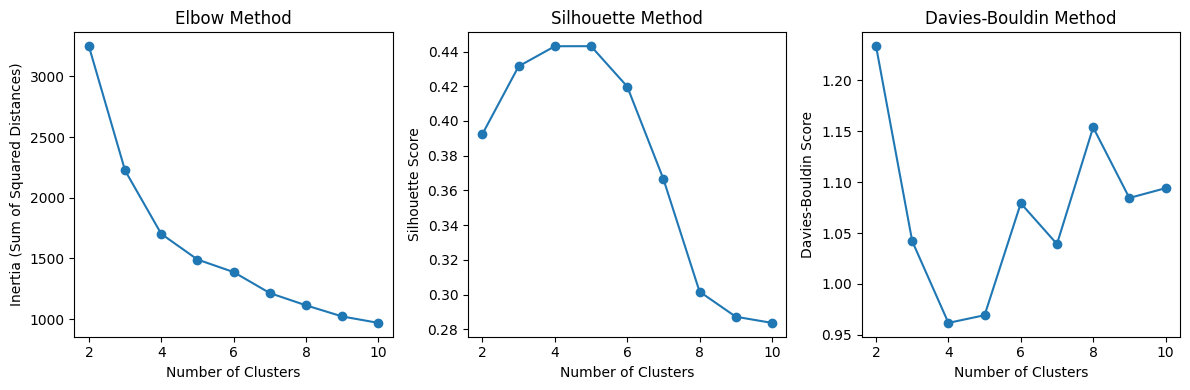

Optimal clusters (Elbow Method): 6
Optimal clusters (Silhouette): 5
Optimal clusters (Davies-Bouldin): 4
Recommended optimal number of clusters: 5


,ID,Cluster
0,5524,4
1,2174,0
2,4141,4
3,6182,0
4,5324,0
5,7446,2
6,965,4
7,6177,0
8,4855,0
9,5899,0


In [40]:
# Key: Ensure that `factors` is already defined and contains the factor scores data from Factor Analysis.
# `data` should be the original DataFrame and should contain an 'ID' column for easy identification of clusters.

# Define the range for the number of clusters to evaluate (from 2 to 10 clusters in this case)
cluster_range = range(2, 11)

# Lists to store metric values for each number of clusters
inertia = []             # Inertia for the Elbow method (Sum of Squared Distances)
silhouette_scores = []   # Silhouette score for evaluating compactness of clusters
davies_bouldin_scores = [] # Davies-Bouldin score for evaluating cluster separation

# Loop over the range of clusters to calculate metrics for each number of clusters
for k in cluster_range:
    # Initialize KMeans with `k` clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Fit the KMeans model and predict labels for each data point
    labels = kmeans.fit_predict(factors)

    # Calculate Inertia (used for the Elbow Method) and add it to `inertia` list
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score and add to `silhouette_scores` list
    silhouette_avg = silhouette_score(factors, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin Score and add to `davies_bouldin_scores` list
    db_score = davies_bouldin_score(factors, labels)
    davies_bouldin_scores.append(db_score)

# Plotting the results of the three metrics for easy visualization

# Elbow Method Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')

# Silhouette Score Plot
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

# Davies-Bouldin Score Plot
plt.subplot(1, 3, 3)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Method')

# Display all three plots together for comparison
plt.tight_layout()
plt.show()

# Find the Elbow point by calculating the "second derivative" of the inertia values
# This helps in identifying the point where the inertia plot shows the most significant change in slope.
second_derivative = np.diff(inertia, 2)
elbow_k = cluster_range[np.argmin(second_derivative) + 1]  # Adding +1 to adjust index for the correct cluster number

# Identify optimal cluster numbers based on Silhouette and Davies-Bouldin scores
optimal_k_silhouette = cluster_range[np.argmax(silhouette_scores)]  # Maximum Silhouette Score
optimal_k_davies_bouldin = cluster_range[np.argmin(davies_bouldin_scores)]  # Minimum Davies-Bouldin Score

# Print the optimal number of clusters for each method
print(f"Optimal clusters (Elbow Method): {elbow_k}")
print(f"Optimal clusters (Silhouette): {optimal_k_silhouette}")
print(f"Optimal clusters (Davies-Bouldin): {optimal_k_davies_bouldin}")

# Final decision on the number of clusters using the median of the three metrics as a heuristic
# The median is chosen to balance the results across the methods.
optimal_k = int(np.median([elbow_k, optimal_k_silhouette, optimal_k_davies_bouldin]))
print(f"Recommended optimal number of clusters: {optimal_k}")

# Apply KMeans clustering with the final selected optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0)

# Add cluster labels to the original DataFrame as a new column 'Cluster'
data['Cluster'] = kmeans_final.fit_predict(factors)

# Display the first few rows of the DataFrame with cluster labels
data[['ID', 'Cluster']].head(20)


###Key Points:
1. Data Preparation Assumptions: Ensure factors contains factor scores and data has an 'ID' column for identifying rows.
2. Cluster Range: Defines the range (2 to 10) for testing different cluster counts.
3. Loop for Metrics Calculation: Calculates Inertia, Silhouette, and Davies-Bouldin scores for each number of clusters.
4. Plots for Visual Methods: Displays Inertia (Elbow), Silhouette, and Davies-Bouldin for easier visualization.
5. Elbow Point Calculation: Uses the second derivative of inertia to find the elbow, indicating an ideal cluster number based on the "bend" in the curve.
6. Optimal Clusters for Silhouette and Davies-Bouldin: Selects cluster numbers with the best metric values for both Silhouette and Davies-Bouldin.
7. Final Cluster Count Decision: Uses the median of the three metrics (Elbow, Silhouette, and Davies-Bouldin) to determine the final optimal_k.
8. KMeans Clustering Application: Uses optimal_k for clustering and appends cluster labels to data.